# Eu preciso de graduação pra trabalhar na área?

Uma das perguntas mais recorrentes de novatos nos canais de comunicação de data science é essa, vamos utilizar a pesquisa no slack do datahackers (a maior comunidade datascience do Brasil, segundo fontes não checadas) para tentar responder essa pergunta!

Esse é o primeiro notebook que compartilho publicamente, quem puder fazer criticas e apontar pontos de melhoria, agradeço imensamente =D

In [ ]:
#Importing and reading data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/pesquisa-data-hackers-2019/datahackers-survey-2019-anonymous-responses.csv')

## 1) Áreas de Atuação

Primeiramente vamos ver as áreas de atuação das pessoas que preencheram o formulário.

In [ ]:
col_search = "('D6', 'anonymized_role')"
sns.barplot(y=df[col_search].value_counts().index,x=df[col_search].value_counts())
plt.show()
print(f'Valores únicos: {df[col_search].unique()}')

Como é possivel ver, a maior parte das pessoas que participaram da pesquisa são desenvolvedores ou engenheiros de software.

Para focar na área de data science, vamos filtrar o dataset para as áreas de interesse, vou remover as seguintes áreas:
Desenvolvedor ou Engenheiro de Software, Outras, Engenheiro e nan (profissião em alta no mercado, de acordo com a maioria dos datasets que ando analisando).

Estatístico e Economista eu acredito que são profissões que podem aplicar Data Science no dia a dia, então vou deixar aqui.

In [ ]:
col_search = "('D6', 'anonymized_role')"
ds = df[~(df[col_search].isin(['Desenvolvedor ou Engenheiro de Software','Outras','Engenheiro','Nan']))].copy()
ds.reset_index(drop=True,inplace=True)

## 2) Áreas de formação

Em seguida vamos ver qual área de formação tem mais profissionais.

In [ ]:
col_search = "('D3', 'anonymized_degree_area')"
sns.barplot(y=ds[col_search].value_counts().index,x=ds[col_search].value_counts())
plt.show()

Computação ganhou de lavagem, seguido por engenharias, o que me deixa feliz, já que sou de engenharia, ainda vou ter amiguinhos  de curso trabalhando comigo.

## 3) Setor de átuação

Seguindo na análise, vamos ver qual setor é mais comum.

In [ ]:
col_search = "('D4', 'anonymized_market_sector')"
sns.barplot(y=ds[col_search].value_counts().index,x=ds[col_search].value_counts())
plt.show()

Mais uma vez, a área de tecnologia ganhando de lavagem, seguido por finanças e 'Outros'.

## 4) Salário

Agora para tratar do salário em si, como foi dado em ranges, vou tratar o salário como a média desse range.

Os valores nan vou tratar como 0.

In [ ]:
#Salário médio a patir dos ranges disponíveis
col_search = "('P16', 'salary_range')"
ds['meanSal'] = ds[col_search].fillna('$ 0/').apply(lambda x: #get the mean in ranges
                    int( #transform all in int in the end
                    (int(str(x)[str(x).rfind(' ')+1:str(x).rfind('/')].replace('.','')) # Get max in range 
                    +
                    int(str(x)[str(x).find('$')+2:str(x).find('/')].replace('.','')) #Get min
                    )/2)) #divide by 2

Agora vamos dar uma olhada na distribuição desses salários.

In [ ]:
plt.figure(figsize=(10,4))

ax1 = plt.subplot(131)
ax2 = plt.subplot2grid((1, 3), (0, 1),colspan=2)

plt.xticks(np.arange(0,25000,step=2500))



sns.violinplot(data=ds['meanSal'],ax=ax1)
sns.lineplot(data=ds['meanSal'].value_counts(),ax=ax2)


plt.tight_layout()

plt.show()

print(f'A média salarial geral é R$ {int(ds["meanSal"].mean())},00')

Temos a média levemente acima dos 5.000, com a mediana em 5.000.

O proximo passo será conhecer essas distribuições de acordo com a área e formação e área de trabalho.

Como algumas áreas apresentam poucas incidências, vou considerar apenas aquelas que tiveram mais de 25 pessoas.

In [ ]:
col_search = "('D4\', \'anonymized_market_sector\')"

mask = ds[col_search].fillna('NA').value_counts() > 25
mask2 = ds[col_search].fillna('NA').apply(lambda x: mask[str(x)])

plt.figure(figsize=(16,5))

ax = sns.boxplot(y=ds['meanSal'].fillna('NA')[mask2], 
               x=ds[col_search][mask2], 
               order=ds[col_search][mask2].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Aparentemente o dinheiro está na área da saúde e e-commerce, seguido de finanças, manufatura e varejo.

Um bom guia para onde se especializar!

Agora vamos fazer o mesmo para a área de formação, com a diferença de tratar os dados que são NaN por conta da pessoa não ter formação.

In [ ]:
#quantidade de pessoas que não tem gradução formal e estão com formação NAN 
#dividido pelo número de pessoas que estão com formação NaN
len(ds[(ds["('D3\', \'anonymized_degree_area\')"].fillna('NAN') == 'NAN') & 
   (ds["('P8', 'degreee_level')"] == "Não tenho graduação formal")]) / \
    len(ds[(ds["('D3\', \'anonymized_degree_area\')"].fillna('NAN') == 'NAN')])

Como esperado, todos os casos de NaN são por conta da não haver uma graduação formal, trataremos dessa forma.

In [ ]:
col_search = 'ajustedDegree'

ds['ajustedDegree'] = ds["('D3\', \'anonymized_degree_area\')"].fillna('Sem graduação formal')

mask = ds[col_search].value_counts() > 25
mask2 = ds[col_search].apply(lambda x: mask[str(x)])

plt.figure(figsize=(16,5))

ax = sns.boxplot(y=ds['meanSal'][mask2], 
               x=ds[col_search][mask2], 
               order=ds[col_search][mask2].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Aparentemente não ter uma graduação não só não é um empecilho, como possui uma mediana maior que as outras áreas!

Destaque para as áreas de computação e matemática/estatística que possuem o terceiro quartil acima dos 20mil, enquadrados nas pesquisas de salário da folha!

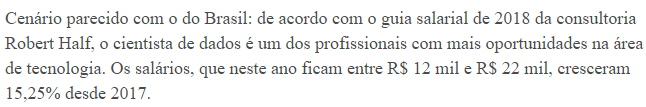

Por fim, vamos verificar o impacto que o nível de estudo tem sobre os salários!

In [ ]:
col_search = "('P8', 'degreee_level')"

mask = ds[col_search].fillna('NA').value_counts() > 25
mask2 = ds[col_search].fillna('NA').apply(lambda x: mask[str(x)])

plt.figure(figsize=(16,5))

ax = sns.boxplot(y=ds['meanSal'].fillna('NA')[mask2], 
               x=ds[col_search][mask2], 
               order=ds[col_search][mask2].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Como esperado, pessoas com doutorado possuem maior salário, seguido por mestrado e pós.

Um fato curioso está no fato que pessoas sem graduação formal tem uma média de salarios maiores que pessoas com graduação!

Outro fato  curioso é que a pesar de possuir média salarial maior, pessoas com doutorado ou Phd tem o primeio quartil em 0, junto com estudantes de graduação.

## Conclusão

A falta de graduação formal não faz diferença no salário final do profissional de datascience, mas caso você tenha formação, as melhores áreas são a de computação e matemática/estatística.

Além disso, as áreas trabalho que estão pagando mais são a área da saúde e e-commerce, seguido de finanças, manufatura e varejo!

## Bias

Após postar o notebook no slack do DataHackers, o Juliano Garcia fez um questionamento excelente a respeito do bias que pode ser resumido em:

Idealmente compararíamos, para quem quer entrar na área, a população “sem graduação, mas que quer trabalhar na área” vs “com graduação, mas que quer trabalhar na área”.

Considerando que todos que estão na comunidade, ou trabalham na área, ou querem trabalhar na área, decidi analisar as populações utilizando a coluna "(P19) = Você se considera um profissional que atua na área de Data Science?"

In [ ]:
col_search = 'ajustedDegree'

#retomando o dataframe original

df['ajustedDegree'] = df["('D3\', \'anonymized_degree_area\')"].fillna('Sem graduação formal') 

percent = df[df['ajustedDegree'] != 'Sem graduação formal']["('P19\', \'is_data_science_professional\')"].sum() \
    / len(df[df['ajustedDegree'] != 'Sem graduação formal'])
print(f'Aproximadamente {int(percent*100)}% das pessoas que tem curso de graduação consideram que estão na área de DS.')

percent = df[df['ajustedDegree'] == 'Sem graduação formal']["('P19\', \'is_data_science_professional\')"].sum() \
    / len(df[df['ajustedDegree'] == 'Sem graduação formal'])
print(f'Enquanto {int(percent*100)}% das pessoas que não tem curso de graduação consideram que estão na área de DS.')

Poderiamos considerar que a diferença no funil de entrada é irrisória, mas...

In [ ]:
soma = len(df[df['ajustedDegree'] == 'Sem graduação formal'])
print(f'O total de participantes sem graduação é {soma} em um universo de {len(df)} participantes, correspondendo a {int((soma/len(df))*100)}% do espaço amostral.')

Para garantir, vamos fazer um teste estatístico.

In [ ]:
from scipy import stats

Hipotese nula: A porcentagem de pessoas sem graduação é igual a porcentagem de pessoas com graduação trabalhando com datascience.

Hipotese alternativa: A porcentagem de pessoas sem graduação é menor que a porcentagem de pessoas com graduação trabalhando com datascience.

In [ ]:

percent = df[df['ajustedDegree'] == 'Sem graduação formal']["('P19\', \'is_data_science_professional\')"].sum() \
    / len(df[df['ajustedDegree'] == 'Sem graduação formal']) #média do público total que está na área

#sem graduação e na área
semgrad_e_ds = df[df['ajustedDegree'] == 'Sem graduação formal']["('P19\', \'is_data_science_professional\')"].sum()
#sem graduação total
semgrad = len(df[df['ajustedDegree'] == 'Sem graduação formal'])

p_value = stats.binom_test(semgrad_e_ds,n=semgrad, p=percent,alternative='less')

if p_value > 0.05:
    print('Não é possivel descartar a hipotese nula que pessoas sem graduação possuem a mesma chance de entrar no mercado que graduados.')
else:
    print('A hipótese de pessoas sem graduação possuirem menos chances de entrar na área é verdadeira!')

Mesmo com esse teste de hipotese, ainda não podemos afirmar com certeza, devido à pequena amostra que temos.